# 2. Amazon

## Titan Embeddings G1 - Text

In [ ]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to generate embeddings with the Amazon Titan Embeddings G1 - Text model (on demand).
"""

import json
import logging
import boto3


from botocore.exceptions import ClientError


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_embeddings(model_id, body):
    """
    Generate a vector of embeddings for a text input using Amazon Titan Embeddings G1 - Text on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        response (JSON): The text that the model generated, token information, and the
        reason the model stopped generating text.
    """

    logger.info("Generating embeddings with Amazon Titan Embeddings G1 - Text model %s", model_id)

    bedrock = boto3.Session(profile_name="sebas").client(service_name='bedrock-runtime')

    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )

    response_body = json.loads(response.get('body').read())

    return response_body


def main():
    """
    Entrypoint for Amazon Titan Embeddings G1 - Text example.
    """

    logging.basicConfig(level=logging.INFO,
                        format="%(levelname)s: %(message)s")

    model_id = "amazon.titan-embed-text-v1"
    input_text = "What are the different services that you offer?"


    # Create request body.
    body = json.dumps({
        "inputText": input_text,
    })


    try:

        response = generate_embeddings(model_id, body)
        print(response)
        print(f"Generated embeddings: {response['embedding']}")
        print(f"Input Token count:  {response['inputTextTokenCount']}")

    except ClientError as err:
        message = err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))

    else:
        print(f"Finished generating embeddings with Amazon Titan Embeddings G1 - Text model {model_id}.")



main()


INFO:__main__:Generating embeddings with Amazon Titan Embeddings G1 - Text model amazon.titan-embed-text-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test


{'embedding': [-0.10595703, -0.21777344, 0.29101562, -0.19628906, -0.26953125, 0.3828125, -0.29101562, 7.247925e-05, -0.32226562, 0.24316406, -0.34570312, 0.014831543, 0.007873535, -0.18554688, 0.0546875, -0.34570312, 0.09716797, 0.734375, 0.33398438, 0.039794922, 0.103515625, 0.22167969, 0.31640625, -0.6171875, 0.55078125, 0.076171875, 0.4296875, 0.23339844, 0.35742188, 0.578125, 0.111816406, -0.2578125, -0.08984375, -0.7578125, -0.19921875, -0.015625, -0.22363281, 0.14648438, 0.03857422, -0.15917969, 0.3515625, 0.39257812, 0.80859375, 0.49804688, 0.92578125, -0.06347656, -0.041015625, 0.20117188, 0.32226562, 0.10205078, 0.115722656, -0.47460938, -0.03540039, -0.09033203, 0.25585938, -0.40234375, 0.51171875, -0.17285156, 0.53515625, -0.24511719, 0.5078125, 0.07373047, 0.6015625, -0.19921875, -0.16601562, -0.43945312, 0.34570312, 0.12792969, 0.03564453, -0.1875, -0.41796875, 0.37109375, -0.4453125, 0.3046875, -0.01574707, -0.07861328, 0.08691406, -0.12695312, 0.3359375, -0.37695312, -0

## Titan Text G1 - Lite

```json
{
 "modelId": "amazon.titan-text-lite-v1",
 "contentType": "application/json",
 "accept": "application/json",
 "body": "{\"inputText\":\"this is where you place your input text\",\"textGenerationConfig\":{\"maxTokenCount\":4096,\"stopSequences\":[],\"temperature\":0,\"topP\":1}}"
}
```

In [ ]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to create a list of action items from a meeting transcript
with the Amazon &titan-text-express; model (on demand).
"""
import json
import logging
import boto3

from botocore.exceptions import ClientError


class ImageError(Exception):
    "Custom exception for errors returned by Amazon &titan-text-express; model"

    def __init__(self, message):
        self.message = message


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_text(model_id, body):
    """
    Generate text using Amazon &titan-text-express; model on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        response (json): The response from the model.
    """

    logger.info(
        "Generating text with Amazon &titan-text-express; model %s", model_id)

    bedrock = boto3.Session(profile_name="sebas").client(service_name='bedrock-runtime')

    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )
    response_body = json.loads(response.get("body").read())

    finish_reason = response_body.get("error")

    if finish_reason is not None:
        raise ImageError(f"Text generation error. Error is {finish_reason}")

    logger.info(
        "Successfully generated text with Amazon &titan-text-express; model %s", model_id)

    return response_body


def main():
    """
    Entrypoint for Amazon &titan-text-express; example.
    """
    try:
        logging.basicConfig(level=logging.INFO,
                            format="%(levelname)s: %(message)s")

        model_id = 'amazon.titan-text-lite-v1'

        prompt = """Meeting transcript: Miguel: Hi Brant, I want to discuss the workstream  
            for our new product launch Brant: Sure Miguel, is there anything in particular you want
            to discuss? Miguel: Yes, I want to talk about how users enter into the product.
            Brant: Ok, in that case let me add in Namita. Namita: Hey everyone 
            Brant: Hi Namita, Miguel wants to discuss how users enter into the product.
            Miguel: its too complicated and we should remove friction.  
            for example, why do I need to fill out additional forms?  
            I also find it difficult to find where to access the product
            when I first land on the landing page. Brant: I would also add that
            I think there are too many steps. Namita: Ok, I can work on the
            landing page to make the product more discoverable but brant
            can you work on the additonal forms? Brant: Yes but I would need 
            to work with James from another team as he needs to unblock the sign up workflow.
            Miguel can you document any other concerns so that I can discuss with James only once?
            Miguel: Sure.
            From the meeting transcript above, Create a list of action items for each person. """

        body = json.dumps({
            "inputText": prompt,
            "textGenerationConfig": {
                "maxTokenCount": 4096,
                "stopSequences": [],
                "temperature": 0,
                "topP": 1
            }
        })

        response_body = generate_text(model_id, body)
        print(f"Input token count: {response_body['inputTextTokenCount']}")

        for result in response_body['results']:
            print(f"Token count: {result['tokenCount']}")
            print(f"Output text: {result['outputText']}")
            print(f"Completion reason: {result['completionReason']}")

    except ClientError as err:
        message = err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))
    except ImageError as err:
        logger.error(err.message)
        print(err.message)

    else:
        print(
            f"Finished generating text with the Amazon &titan-text-express; model {model_id}.")


if __name__ == "__main__":
    main()


INFO:__main__:Generating text with Amazon &titan-text-express; model amazon.titan-text-lite-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test
INFO:__main__:Successfully generated text with Amazon &titan-text-express; model amazon.titan-text-lite-v1


Input token count: 265
Token count: 70
Output text: 
            1. Miguel will document his concerns about the product entry process.
            2. Brant will work on simplifying the product entry process and making it more user-friendly.
            3. Brant will work with James from another team to unblock the sign-up workflow.
            4. Miguel will share the action items with Brant and James.
Completion reason: FINISH
Finished generating text with the Amazon &titan-text-express; model amazon.titan-text-lite-v1.


## Titan Text G1 Express

```json
{
 "modelId": "amazon.titan-text-express-v1",
 "contentType": "application/json",
 "accept": "application/json",
 "body": "{\"inputText\":\"this is where you place your input text\",\"textGenerationConfig\":{\"maxTokenCount\":8192,\"stopSequences\":[],\"temperature\":0,\"topP\":1}}"
}
```

In [ ]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to create a list of action items from a meeting transcript
with the Amazon &titan-text-express; model (on demand).
"""
import json
import logging
import boto3

from botocore.exceptions import ClientError


class ImageError(Exception):
    "Custom exception for errors returned by Amazon &titan-text-express; model"

    def __init__(self, message):
        self.message = message


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_text(model_id, body):
    """
    Generate text using Amazon &titan-text-express; model on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        response (json): The response from the model.
    """

    logger.info(
        "Generating text with Amazon &titan-text-express; model %s", model_id)

    bedrock = boto3.Session(profile_name="sebas").client(service_name='bedrock-runtime')

    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )
    response_body = json.loads(response.get("body").read())

    finish_reason = response_body.get("error")

    if finish_reason is not None:
        raise ImageError(f"Text generation error. Error is {finish_reason}")

    logger.info(
        "Successfully generated text with Amazon &titan-text-express; model %s", model_id)

    return response_body


def main():
    """
    Entrypoint for Amazon &titan-text-express; example.
    """
    try:
        logging.basicConfig(level=logging.INFO,
                            format="%(levelname)s: %(message)s")

        model_id = 'amazon.titan-text-express-v1'

        prompt = """Meeting transcript: Miguel: Hi Brant, I want to discuss the workstream  
            for our new product launch Brant: Sure Miguel, is there anything in particular you want
            to discuss? Miguel: Yes, I want to talk about how users enter into the product.
            Brant: Ok, in that case let me add in Namita. Namita: Hey everyone 
            Brant: Hi Namita, Miguel wants to discuss how users enter into the product.
            Miguel: its too complicated and we should remove friction.  
            for example, why do I need to fill out additional forms?  
            I also find it difficult to find where to access the product
            when I first land on the landing page. Brant: I would also add that
            I think there are too many steps. Namita: Ok, I can work on the
            landing page to make the product more discoverable but brant
            can you work on the additonal forms? Brant: Yes but I would need 
            to work with James from another team as he needs to unblock the sign up workflow.
            Miguel can you document any other concerns so that I can discuss with James only once?
            Miguel: Sure.
            From the meeting transcript above, Create a list of action items for each person. """

        body = json.dumps({
            "inputText": prompt,
            "textGenerationConfig": {
                "maxTokenCount": 4096,
                "stopSequences": [],
                "temperature": 0,
                "topP": 1
            }
        })

        response_body = generate_text(model_id, body)
        print(f"Input token count: {response_body['inputTextTokenCount']}")

        for result in response_body['results']:
            print(f"Token count: {result['tokenCount']}")
            print(f"Output text: {result['outputText']}")
            print(f"Completion reason: {result['completionReason']}")

    except ClientError as err:
        message = err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))
    except ImageError as err:
        logger.error(err.message)
        print(err.message)

    else:
        print(
            f"Finished generating text with the Amazon &titan-text-express; model {model_id}.")


if __name__ == "__main__":
    main()


INFO:__main__:Generating text with Amazon &titan-text-express; model amazon.titan-text-express-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test
INFO:__main__:Successfully generated text with Amazon &titan-text-express; model amazon.titan-text-express-v1


Input token count: 265
Token count: 74
Output text: Based on the provided content, here is a list of action items for each person:

1. Miguel: Document any other concerns so that I can discuss with James only once.
2. Brant: Work with James from another team to unblock the sign up workflow.
3. Namita: Work on the landing page to make the product more discoverable.
Completion reason: FINISH
Finished generating text with the Amazon &titan-text-express; model amazon.titan-text-express-v1.


## Titan Image Generator G1

```json
{
 "modelId": "amazon.titan-image-generator-v1",
 "contentType": "application/json",
 "accept": "application/json",
 "body": "{\"textToImageParams\":{\"text\":\"this is where you place your input text\"},\"taskType\":\"TEXT_IMAGE\",\"imageGenerationConfig\":{\"cfgScale\":8,\"seed\":0,\"quality\":\"standard\",\"width\":1024,\"height\":1024,\"numberOfImages\":3}}"
}
```

INFO:__main__:Generating image with Amazon Titan Image Generator G1 model amazon.titan-image-generator-v1
INFO:botocore.tokens:Loading cached SSO token for amber-test
INFO:botocore.tokens:SSO Token refresh succeeded


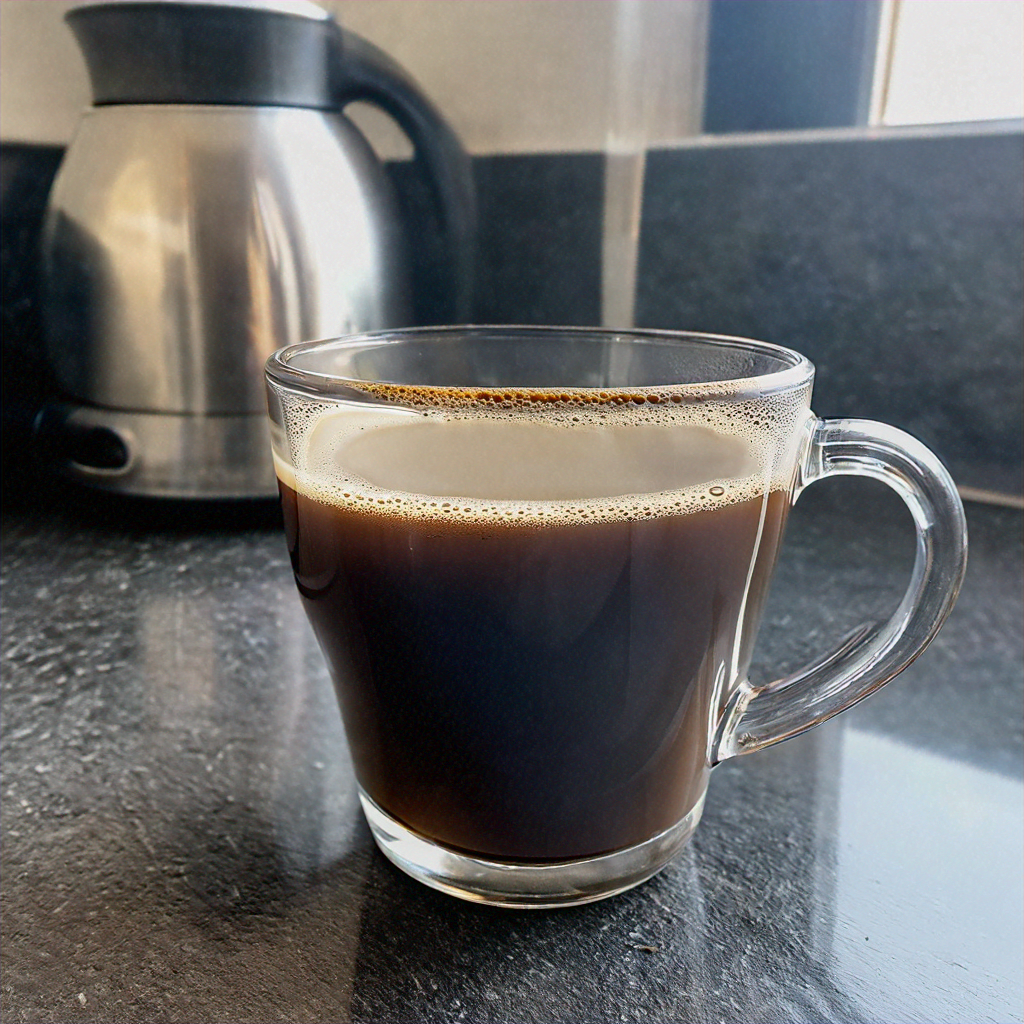

In [3]:
# Text to Image generation

# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
"""
Shows how to generate an image from a text prompt with the Amazon Titan Image Generator G1 model (on demand).
"""
import base64
import io
import json
import logging
import os
import boto3
from PIL import Image

from botocore.exceptions import ClientError


class ImageError(Exception):
    "Custom exception for errors returned by Amazon Titan Image Generator G1"

    def __init__(self, message):
        self.message = message


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


def generate_image(model_id, body):
    """
    Generate an image using Amazon Titan Image Generator G1 model on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        image_bytes (bytes): The image generated by the model.
    """

    logger.info(
        "Generating image with Amazon Titan Image Generator G1 model %s", model_id)

    bedrock = boto3.Session(profile_name="sebas").client(service_name='bedrock-runtime')

    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )
    response_body = json.loads(response.get("body").read())

    base64_image = response_body.get("images")[0]
    """ 
    base64_bytes = base64_image.encode('ascii')
    image_bytes = base64.b64decode(base64_bytes)

    finish_reason = response_body.get("error")

    if finish_reason is not None:
        raise ImageError(f"Image generation error. Error is {finish_reason}")

    logger.info(
        "Successfully generated image with Amazon Titan Image Generator G1 model %s", model_id)
    """
    return base64_image


def main():
    """
    Entrypoint for Amazon Titan Image Generator G1 example.
    """

    logging.basicConfig(level=logging.INFO,
                        format="%(levelname)s: %(message)s")

    model_id = 'amazon.titan-image-generator-v1'

    prompt = """A photograph of a cup of coffee from the side."""

    body = json.dumps({
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 1024,
            "width": 1024,
            "cfgScale": 8.0,
            "seed": 0
        }
    })

    try:
        base64_image = generate_image(model_id=model_id,
                                     body=body)
        
        os.makedirs("data", exist_ok=True)
        image_amazon = Image.open(io.BytesIO(base64.decodebytes(bytes(base64_image, "utf-8"))))
        image_amazon.save("data/image_amazon.png")
        return image_amazon
        
        #image = Image.open(io.BytesIO(image_bytes))
        #image.show()

    except ClientError as err:
        message = err.response["Error"]["Message"]
        logger.error("A client error occurred: %s", message)
        print("A client error occured: " +
              format(message))
    except ImageError as err:
        logger.error(err.message)
        print(err.message)

main()


## Titan multimodal Embeddings G1

```json
{
  "modelId": "amazon.titan-embed-image-v1",
  "contentType": "application/json",
  "accept": "application/json",
  "body": {
    "inputText": "this is where you place your input text",
    "inputImage": "<base64_image_string>"
  }
}
```